In [61]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import json
import plotly.graph_objects as go
from geopy.geocoders import Nominatim
from shapely.geometry import Point, Polygon
from area import area
from sklearn import neighbors

%matplotlib inline

In [62]:
postmates = pd.read_csv('/Users/baileyrusso/PycharmProjects/GrubHubScraper/postmates_all3.csv')
postmates = postmates.loc[:, ~postmates.columns.str.contains('^Unnamed')]

# Categories with most favorites

In [63]:
groupedCat = postmates.groupby('Category').aggregate('mean').sort_values('Favorites',ascending=False).head(25)
groupedCat

,Favorites,MenuItemPrice,Latitude,Longitude
Category,,,,
GLUTEN-FREE,641.000000,17.552000,40.715104,-73.962488
MAC & CHEESE,617.000000,13.557246,40.730168,-73.983649
SOUTHERN,579.000000,5.052121,40.723624,-73.978938
VEGAN,465.645669,9.177063,40.747222,-73.985059
KOREAN,355.889474,15.757715,40.724380,-73.987017
LATIN AMERICAN,354.391304,8.398098,40.720107,-73.993666
SHANGHAI,330.000000,17.365854,40.668645,-73.993636
ACAI,294.150000,12.322625,40.729453,-74.000667
SUSHI,271.824283,11.016238,40.703100,-73.981251


# Restaurants with Most Favorites

In [64]:
groupedName = postmates.groupby('Name').aggregate('mean').sort_values('Favorites',ascending=False).head(25)
groupedName

,Favorites,MenuItemPrice,Latitude,Longitude
Name,,,,
KazuNori | The Original Handroll Bar,3300.000000,16.570000,40.659813,-74.001266
SUGARFISH,1900.000000,19.974490,40.725149,-74.003624
The Halal Guys,1211.516129,6.144833,40.740921,-73.981887
Bondi Sushi - Nomad,1000.000000,8.310345,40.744668,-73.987560
Thai Villa,928.033333,14.366667,40.738981,-73.990706
Bonchon Chicken,774.000000,11.190000,40.747406,-73.985097
Grace Street,765.000000,12.569385,40.747860,-73.986477
The Butcher's Daughter,757.000000,8.900000,40.720716,-73.994785
by CHLOE.,756.731707,7.036250,40.721285,-73.989290


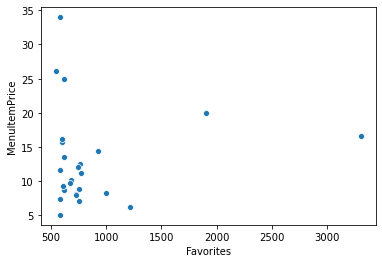

In [65]:
sns.scatterplot('Favorites','MenuItemPrice',data=groupedName,)

In [73]:
postmates.sort_values(['MenuItem','MenuItemPrice'])

,Name,Category,Favorites,Address,MenuItem,MenuItemDescription,MenuItemPrice,Address_Coordinates,Latitude,Longitude
21617,Famous Original Ray's Pizza,PIZZA,143.0,736 7TH AVE,"""Bunless"" Keto Friendly Burger",Served with Lettuce & Tomato,9.50,"(40.7603624, -73.984012)",40.760362,-73.984012
45015,"b""Famous Original Rays Pizza""",PIZZA,104.0,204 9TH AVE,"""Bunless"" Keto Friendly Burger",Served with Lettuce & Tomato,9.50,"(40.7460286, -74.0014102)",40.746029,-74.001410
16879,Flowers Cafe,CAFE,83.0,39 ESSEX STREET,"""Dirty"" Potato Chips","Gluten free and kettle cooked to perfection, e...",2.50,"(40.7162314, -73.98969331114047)",40.716231,-73.989693
31453,Healthy Market Food and Deli,DELI,0.0,632 10TH AVE,"""Dirty"" Potato Chips",5 oz. Small bag.,3.99,"(40.7613835, -73.9939749)",40.761384,-73.993975
21574,Famous Original Ray's Pizza,PIZZA,143.0,736 7TH AVE,"""Low Carb"" 12"" Cauliflower Crust Pizza","12"" Cauliflower Crust Pizza, each addl topping $3",14.00,"(40.7603624, -73.984012)",40.760362,-73.984012
...,...,...,...,...,...,...,...,...,...,...
60604,Krispy Kreme Doughnuts,DONUT,0.0,36 E 23RD ST.,NaN,NaN,NaN,"(40.66294352727272, -73.99926954545454)",40.662944,-73.999270
61244,KFC,FAST FOOD,130.0,242 E 14TH ST,NaN,NaN,NaN,"(40.7322777, -73.9852705)",40.732278,-73.985270
61978,Paris Baguette,BAKERY,0.0,6 W 32ND ST,NaN,NaN,NaN,"(40.7472746, -73.9863372376147)",40.747275,-73.986337
62171,Veggie Grill,VEGETARIAN,130.0,12 W 23RD ST,NaN,NaN,NaN,"(40.7416028, -73.9902269)",40.741603,-73.990227
